In this article, I will try to investigate the following question,
> who's and who's not survive in the titanic?

Below is the description of titanic data, from the original link, [Kaggle](https://www.kaggle.com/c/titanic/data).

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

Next I will import the related libraries to perform the analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('darkgrid')
import numpy as np
import scipy.stats as sp

In [3]:
df = pd.read_csv('dataset/titanic_data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Let's see the number of rows in this dataset

In [5]:
df.shape

(891, 12)

And the number of person,

In [6]:
df.Name.nunique()

891

Okay, so we know that each person represent one observation in this dataset. Let's the distribution of age in this dataset.

In [7]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

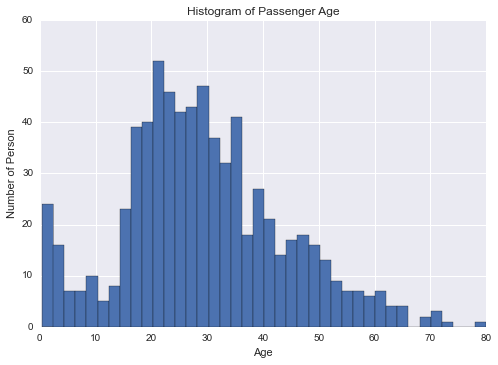

In [8]:
df.Age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

I choose histogram since I only analyze one numerical variable. I choose 40 as nunmber of bins to let the histogram show smooth distribution of the data. And since we see from the statistics that the age is max at 80 years old, every 20 year will have the exact edge of the histogram.

I can see from this histogram that many children is below 5 years old. Some of them are babies which we see that there's a peak around 1 year. This histogram will have an almost normal distribution if there isn't a peak around 1 year old. The earlier statistics show that median is 28 year old, and mean is 29 year old. You can also tell that the distribution is normal when you have similar median and mean.

Overall the plot tells us that the passengers' age is distributed around mid-end 20's. Let's see if the distribution of the age is actually different between whether or not the passengers have survived.


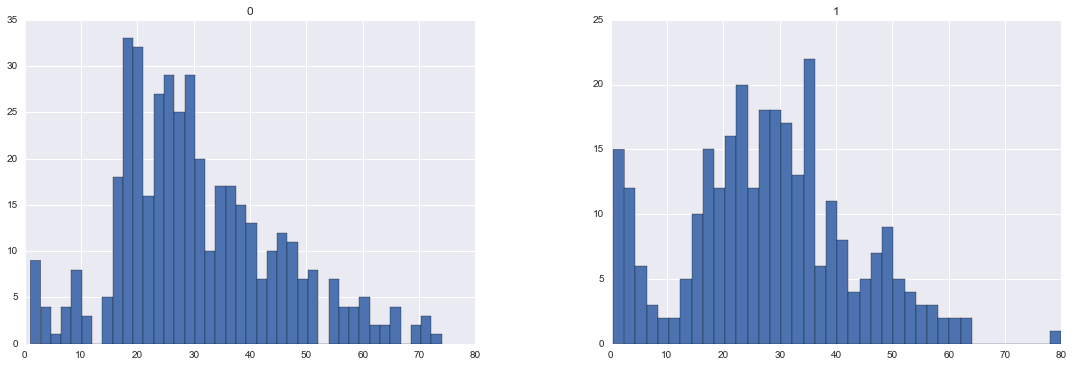

In [9]:
df.hist(column='Age',by='Survived',bins=40,figsize=(18,6),xrot=.5);

Now this is interesting. We can see that from both histogram, the distribution is a little bit different. Note that `Survived` is categorical, 0 represents not survived with figure in the left, and 1 represent survived with figure in the right.

The distribution of the age shows bimodal distribution of people who survived. Many old people died from the tragedy, though we see 1 80 year-old man did survive the tragedy. We can see the person below.

In [10]:
df[(df.Survived == 1) & (df.Age == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S


To support the plot, I also include relevant statistics between Age and Survived.

In [11]:
df.groupby('Survived').Age.describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
dtype: float64

If we see from the statistics everything is similar. Children who died minimum is 0, while survie minimum at 5 months old. Again if I observe the plot, many children survived the accident, at least compared to the children who didn't.

If you remember from *Titanic* movies, children and women are prioritized to get to the lifeboat. It's interesting to know whether this is actually true.

*Is women and children survival rate is higher than those who didn't?*

To get into this, I create a frequency table. Children are described as passenger below 12 years old. And gender already described by `Sex` column. I count the passengerId since this is unique id for every passenger. This is what I get below. 

In [12]:
df['WomenChildren'] = np.where((df.Age <= 12) | (df.Sex == 'female'),1,0)

freq_surv_wochil =(df
                  .groupby(['Survived','WomenChildren'])
                  .PassengerId
                  .count()
                  .unstack()) ## unstack one of multi index table as a column.
freq_surv_wochil

WomenChildren,0,1
Survived,,
0,452,97
1,88,254


From the frequency table, we can see a magnitude difference of women and children that survived compared to those who didn't. Women and children survived is about 2.5 times higher than women and children whom not survived. On the contrary, adult men is about 5 times higher between not survived and survived. To be fair, let's put this to a statistical test.


Since both independent and dependent variable are categorical, I choose Chi-Square Independece test. For this test to be true, Let's validate the condition,

* Each cell has at least 5 expected cases. **Checked**.
* Each case only contributes to once cell in the table. **Checked**.
* If sample, random sample and less than 10% population. **This dataset is already a population**.

Since we have checked all the condition, we can proceed to the test. I'm using ChiSquare from Scipy library. This function has takes frequency table that I've created earlier, and then output chisquare statistic, p-value, degree of freedom, and the expected frequency table if both variables aren't related. 


In [13]:
chi,p,dof,expected = sp.chi2_contingency(freq_surv_wochil)
(chi,p)

(280.39304896462471, 6.1651574254838001e-63)

And as expected, chi-square statistic provide very high number, and p value which practically zero. Thus the data provide convincing evidence that whether the passenger woman or children and whether they survived are related. Just for the sake of curiosity, how is the accuracy if we take it as predictive model?

In [32]:
(df['WomenChildren']  == df.Survived).mean()

0.79236812570145898

There you go, I got 79.24% accuracy.

Titanic was a massive ship. Again remembering the movie back then, rich and poor people get to the ship. I wonder how Titanic data required social economy status of passenger, which represented by `Pclass`. We could see if the fare vary across this variable.

In [39]:
df.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

From this result, we see that there's huge price jump between upper class and middle/lower class! Although it's no surprise. I recall from the movie, upper class room is family room, and facilitated with a lot of fancy stuff. While in lower class (DiCaprio's room), people have to shared between other passengers.

Perhaps number alone won't satisfy you enough. Let's take it to the visualization. And since in this analysis, we want to know people who survive, I also throw whether the people `survive` into the equation.

I will plot the visualization using bar plot, since I want to see different of Fare across social-economic status. And I want to differentiate the status by `Survive` to see if it depends on these two variables.

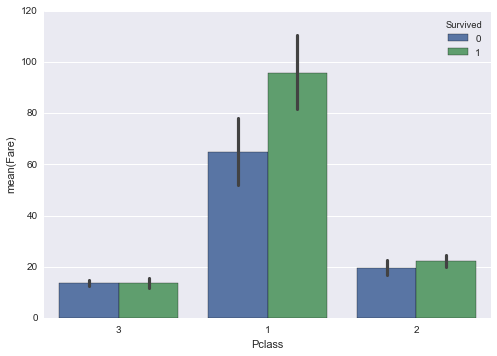

In [18]:
sns.barplot(x="Pclass",y="Fare",hue="Survived",data=df,estimator=np.mean);

Looking at this plot, I see something expected and unexpected. First the expected one, I see the average of fare of middle/lower is similar but the difference is huge when compared to the upper class. This is again, expected since earlier we have saw the number.

The unexpected one, is whether survive vary in the upper class! Lower/middle class has similar fare, but there is a clear difference of average fare of in the upper class which result in life and death difference. What's the cause of this? They pay same upper class. What makes the different price in one class? What I can think of is because they have different cabin. Is it because lifeboats are placed in particular cabin? Unfortunately it's hard to know which cabin is better than others, except with Fare. 

In [112]:
(df[(df.Pclass == 1)]
 .groupby([df.Cabin.str[:1],'Survived'])
 .Fare
 .mean()
 .unstack())

Survived,0,1
Cabin,,
A,35.496350,44.341071
B,57.137500,132.832026
C,99.972396,100.274046
D,59.613086,64.505123
E,48.460714,58.571067
T,35.500000,NaN


We see from the table above, Cabin with prefix B is the most expensive one compared to ohers. Cabin C is probably the most expensive on average.  But will this guarantee for whether the passengers survive?

In [114]:
(df[(df.Pclass == 1)]
 .groupby([df.Cabin.str[:1],'Survived'])
 .PassengerId
 .count()
 .unstack())

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,7,22
E,7,18
T,1,NaN


Again, the cabin doesn't guarantee whether the passengers are save. Cabin B has 3 times ratio but so other cabins. Cabin C not even a magnitude higher. So there's some limitations that we have. 

At least whether the passenger is in the upper class can be one of the factor of whether the passengers is survived. Let's test those. Again I will build frequency table of SES vs whether passengers is survived, and perform Chi-Square Independence test to confirm. 

In [16]:
pd.crosstab(df.Pclass,df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Since we already validated our dataset earlier, we can directly perform the statistical test.

In [115]:
chi2,p,dof,expected = sp.chi2_contingency(pd.crosstab(df.Pclass,df.Survived))
(chi2,p)

(102.88898875696056, 4.5492517112987927e-23)

So indeed, the test statistic result really high and again p-value is practically zero. The data provide convincing evidence that economic status and whether they survived is related.

So again based on observation of the data what I found is many passengers who survived is based on:

* Passengers is women or babies
* Passengers is an upper class

Testing the accuracy if we want to built predictive modelling:

In [116]:
((df['WomenChildren'] == df['Survived']) | # Whether passengers is women or babies
 ((df.Pclass == 1) == df['Survived'])).mean() # or they are an upper class SES.

0.94500561167227837

Okay, so I achieved 94.5% accuracy by statistic modelling. There's some limitation in my analysis is determining what caused difference in survived in upper classs. Checking whether the cabin has something to do about it is failed.

Note that what I really do is observation based on this data. Hence this is **correlation** and not causation. You will have a causation when you have a controlled experiment. One must rebuild titanic condition, how it wrecked, and makes a total near-to-death experience. I don't really think your participants want to experiment that.  